# Flight Price Prediction

***
_**Importing the Required Liabraries & Packages**_

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from chart_studio.plotly import plot,iplot
import ydata_profiling as pf
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

_**Changing the default working directory path&Reading the Dataset using Pandas Command**_

In [2]:
os.chdir('C:\\Users\\mural\\Documents\\Batch 74 Day 38\\Project 12 Flight Price Predict Heroku')
df=pd.read_excel('Data_Train.xlsx')

_**Automated Exploratory Data Analysis(EDA) with ydata_profiling(pandas_profiling)**_

In [3]:

display(pf.ProfileReport(df))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##  Data Cleaning:

_**dropping all the null value from the dataset and checking the null values of the all the columns after dropping it**_

In [4]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

_**Adding the new columns by seperating the day and month from the <span style= 'color:blue'>Date of Journey</span> column**_

In [5]:
df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.month

_**Adding the new columns by seperating the Hour and Minute from the <span style= 'color:blue'> Depature Time and Arrival Time</span> column**_

In [6]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

**_Assigning the new variable and splitting hour and minutes and extracting it from the <span style='color:blue'>Duration</span> column_**

In [7]:
duration=df['Duration'].str.split(' ',expand=True)

_**Filling out the nul values to 00 minutes to the minutes column of the assigned new variable**_

In [8]:
duration[1].fillna('00m',inplace=True)

_**Adding two new columns with the duration hour and duration minutues from the assigned new variable columns**_

In [9]:
df['Duration_hr']=duration[0].apply(lambda x:x[:-1])
df['Duration_min']=duration[1].apply(lambda x:x[:-1])

_**Setting the cpnfiguration file and plotting bar graph with Airlines and its Average Price; and saving the PNG file**_

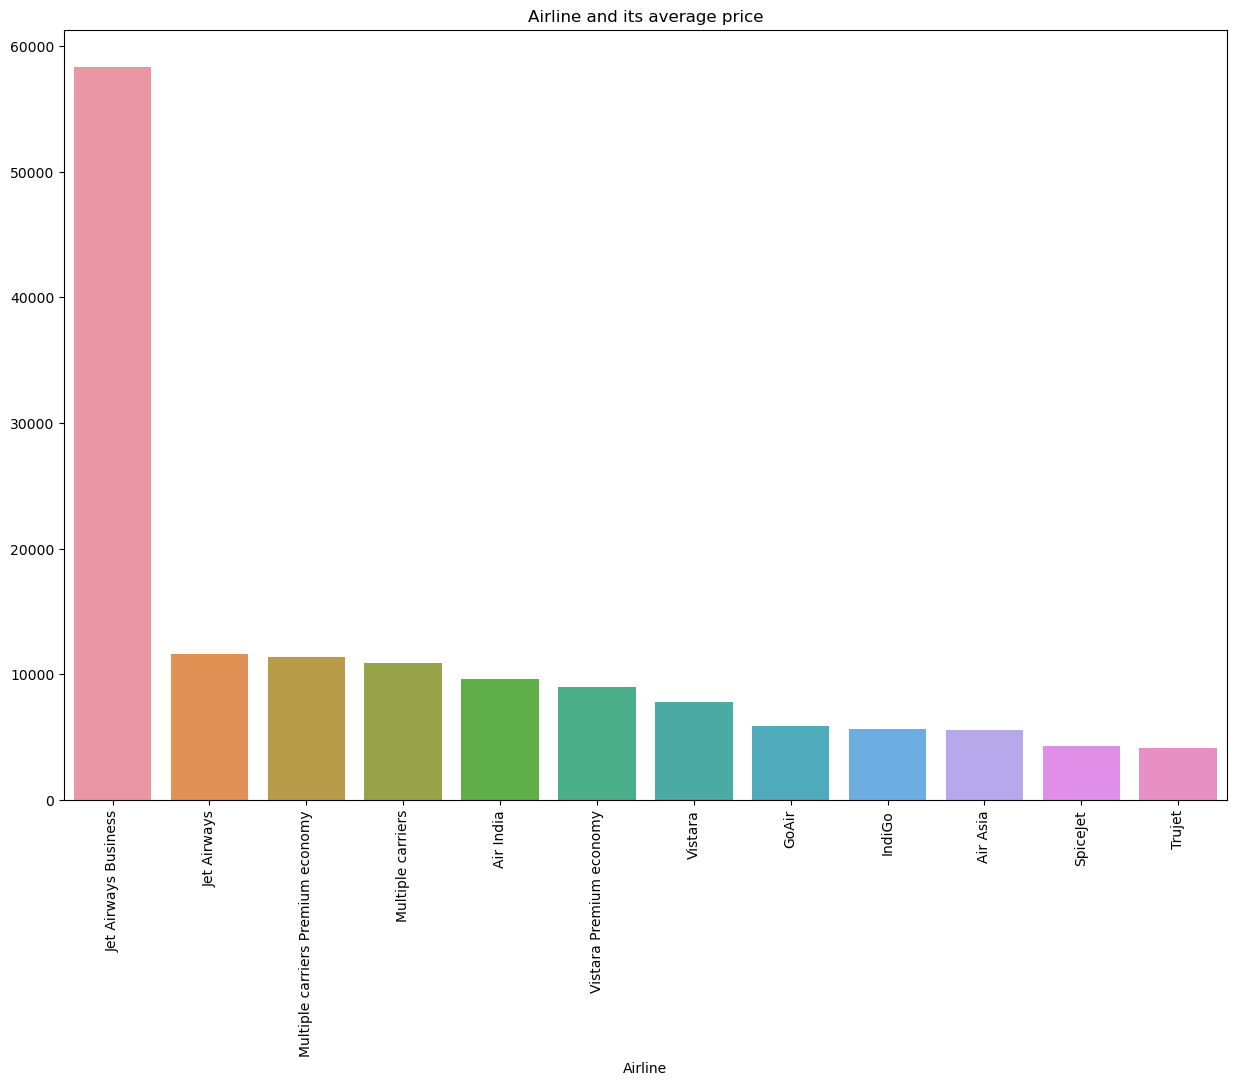

In [10]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=90)
plt.title('Airline and its average price')
plt.savefig('Airline and its average price.png')
plt.show()

_**Plotting the box plot with Airlines and its Price; and saving the PNG file**_

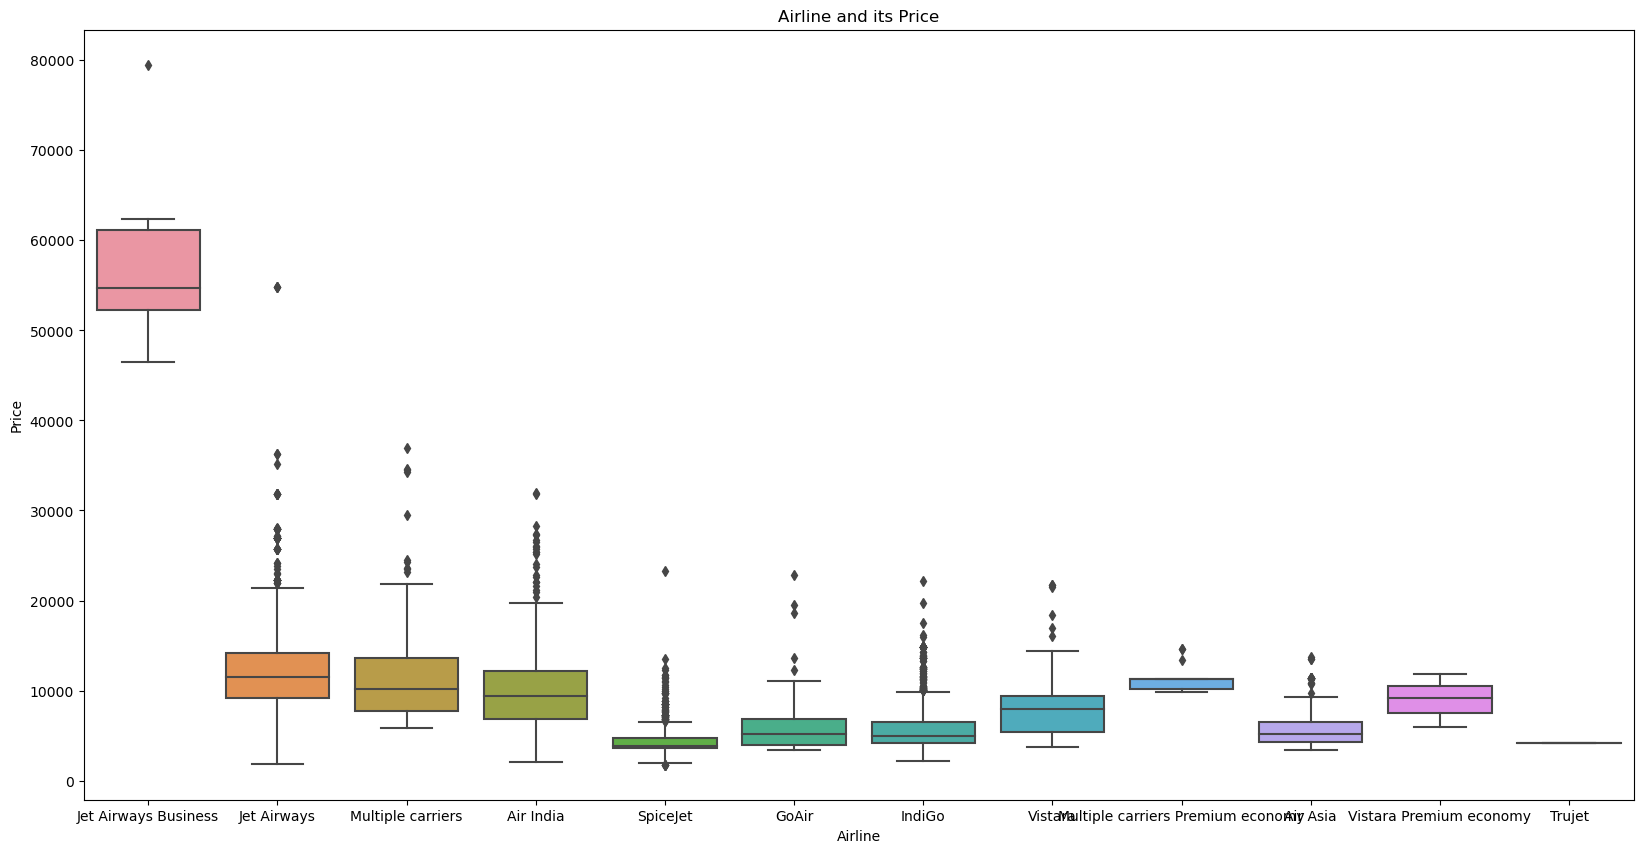

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.title('Airline and its Price')
plt.savefig('Airline and its Price.png')
plt.show()

_**Plotting the box plot with Airlines Price and Total Stops; and saving the PNG file**_

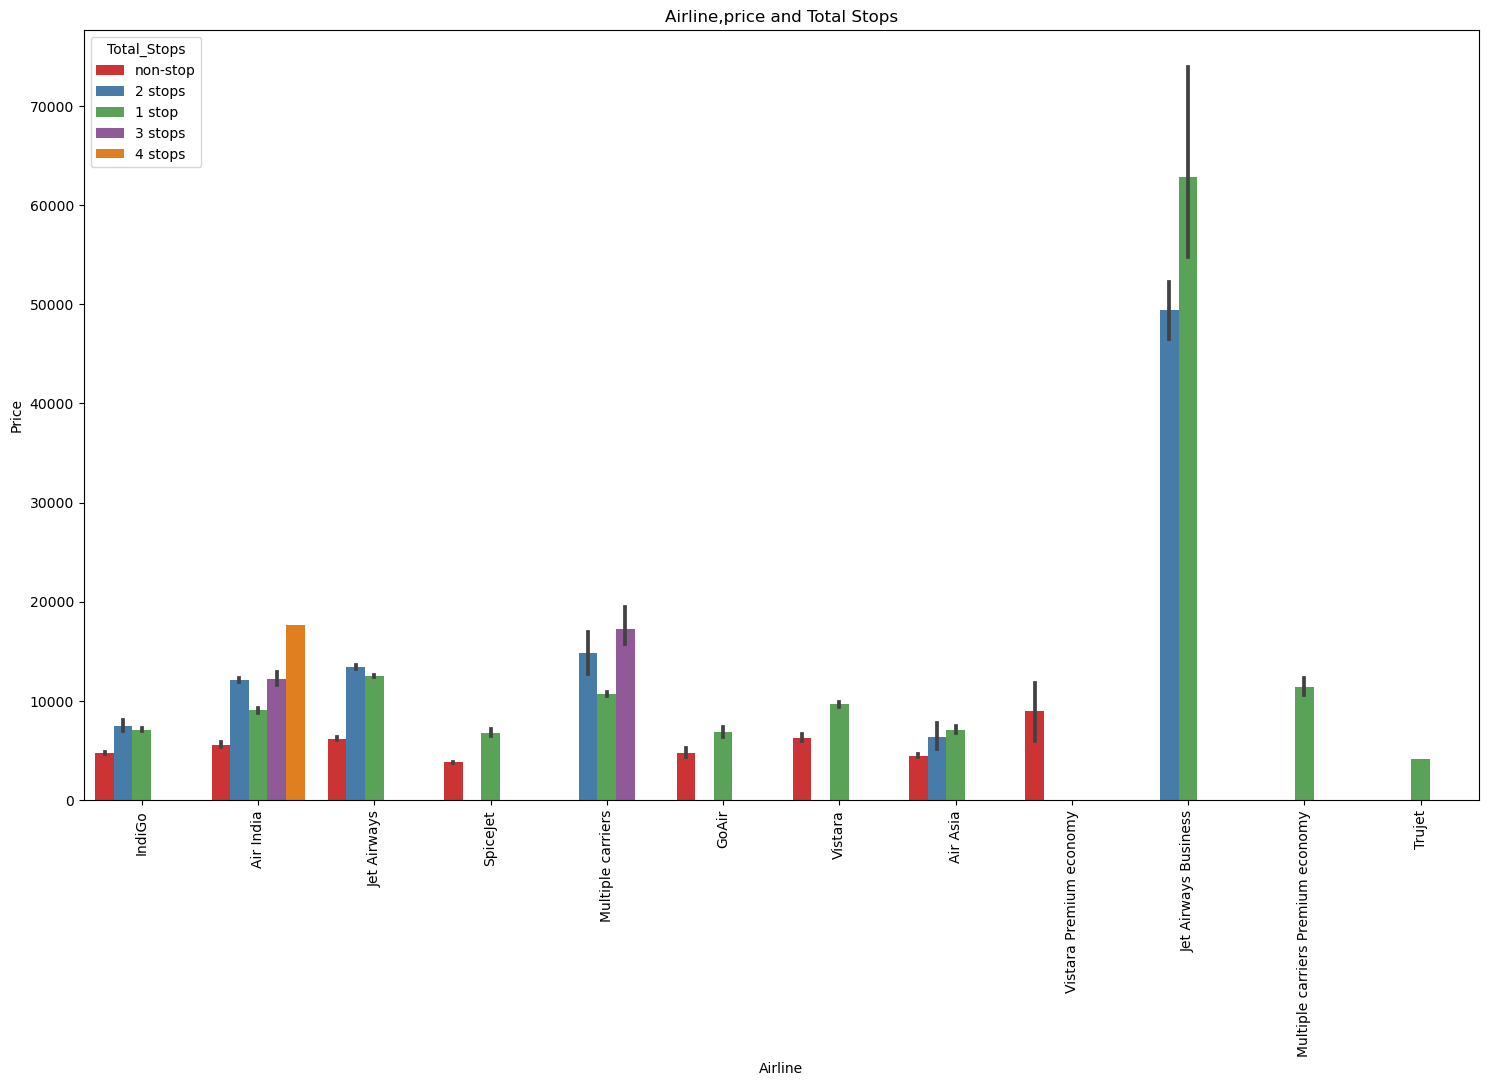

In [12]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Airline,price and Total Stops')
plt.savefig('Airline,price and Total Stops.png')
plt.show()

_**Dropping the columns <span style='color:blue'> Date of Journey </span> ,<span style='color:blue'> Arrival Time </span> ,<span style='color:blue'> Depature Time </span>, <span style='color:blue'> Duration </span> from the dataset which is not needed**_

In [13]:
df.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Duration'],axis=1,inplace=True)

In [14]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

_**Plotting the bar graph Desination and Price and Saving the PNG file**_

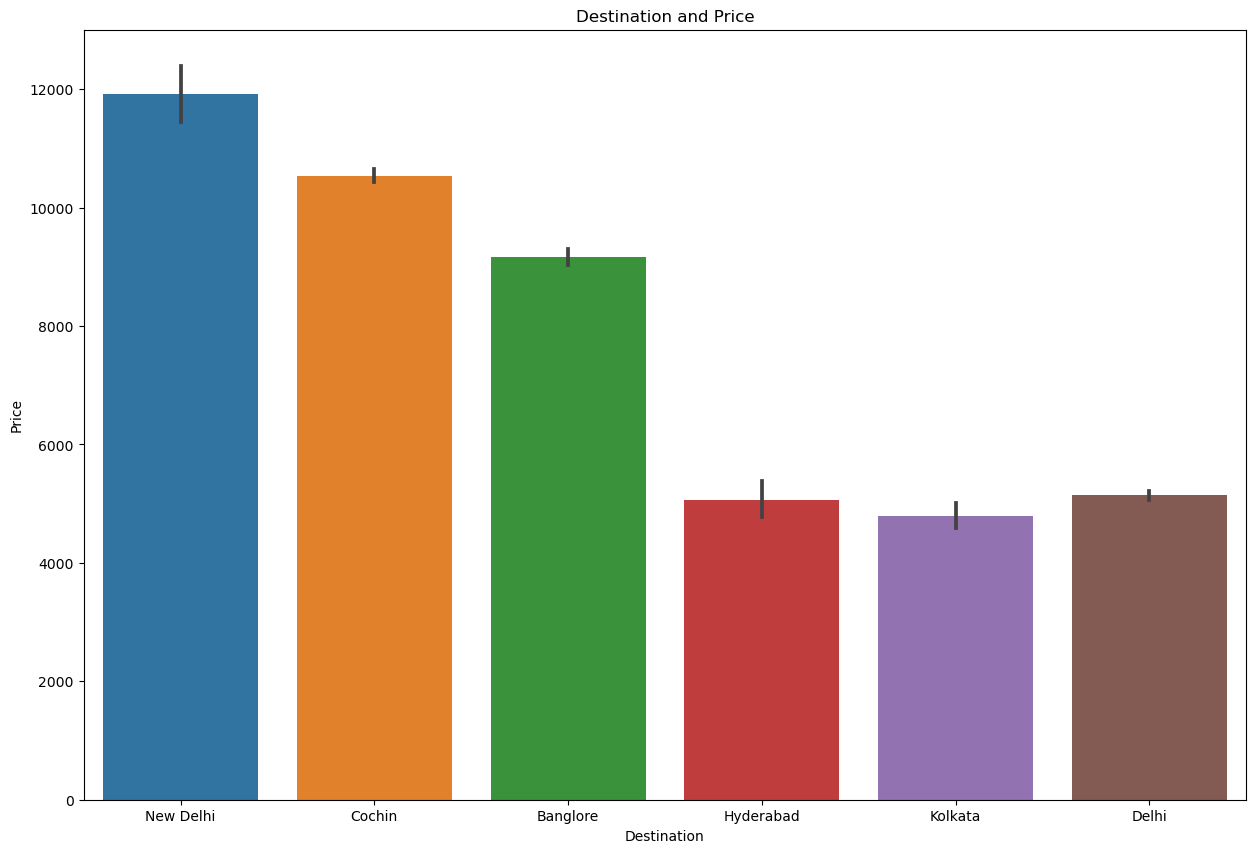

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.title('Destination and Price')
plt.savefig('Destination and Price.png')
plt.show()

_**Plotting the bar graph Source and Price and Saving the PNG file**_

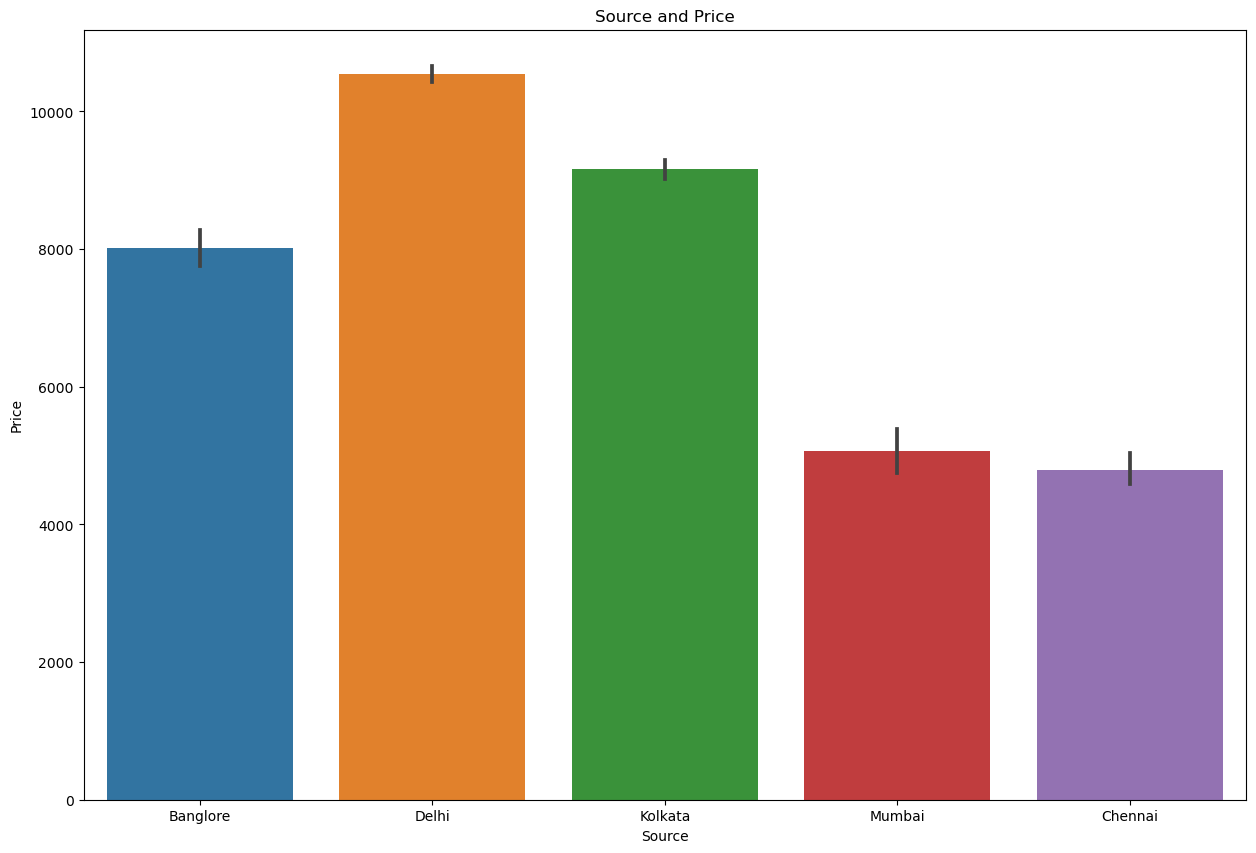

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.title('Source and Price')
plt.savefig('Source and Price.png')
plt.show()

_**Replacing the same cities under single name from the <span style='color:blue'> Destination</span> column**_

In [17]:
df['Destination']=df['Destination'].apply(lambda x:x.replace('New Delhi','Delhi'))

_**Checking the city names of the <span style='color:blue'> Destination</span> column**_

In [18]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

_**Plotting the bar graph with Destination and price ; and saving the Png file**_

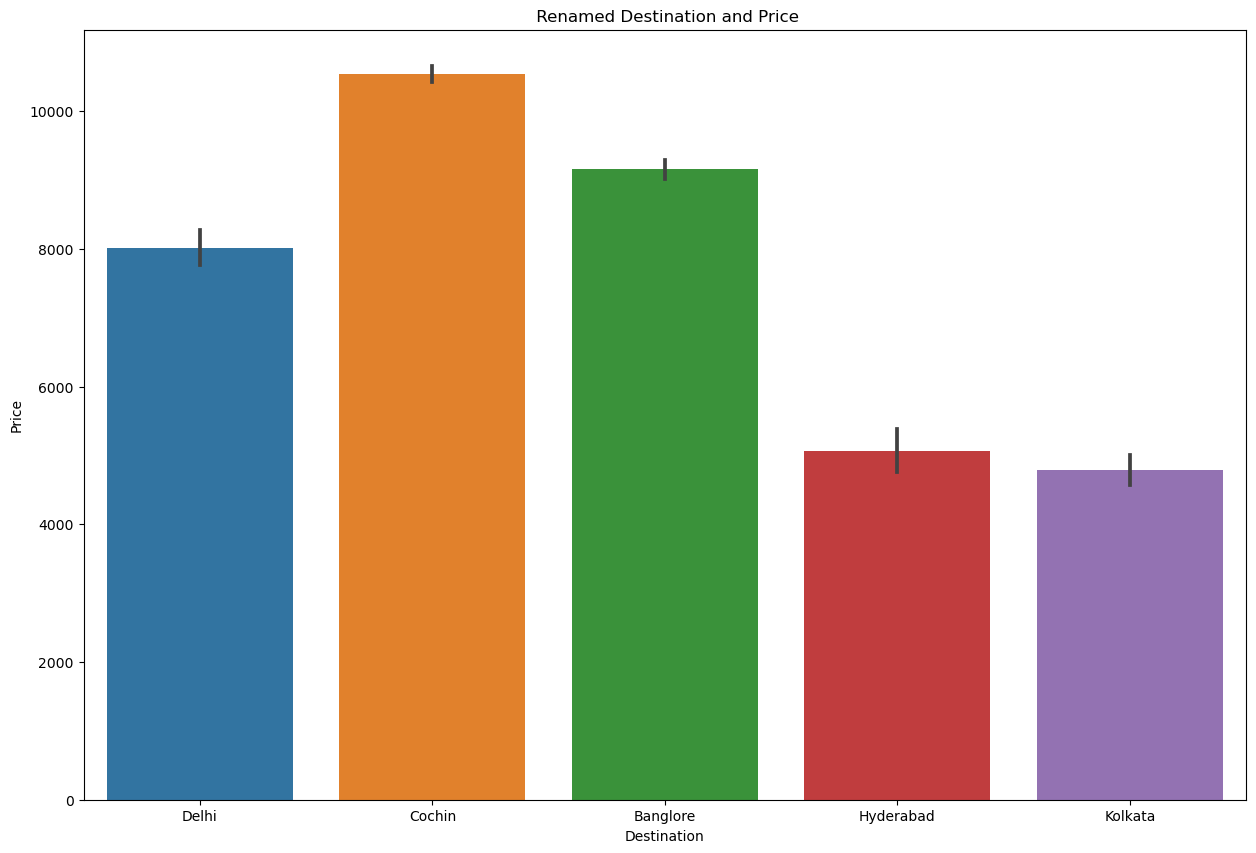

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.title(' Renamed Destination and Price')
plt.savefig('Renamed Destination and Price.png')
plt.show()

_**Getting the correlation value from all the numeric columns from the independent variable using seaborn Heatmap & saving the PNG file**_

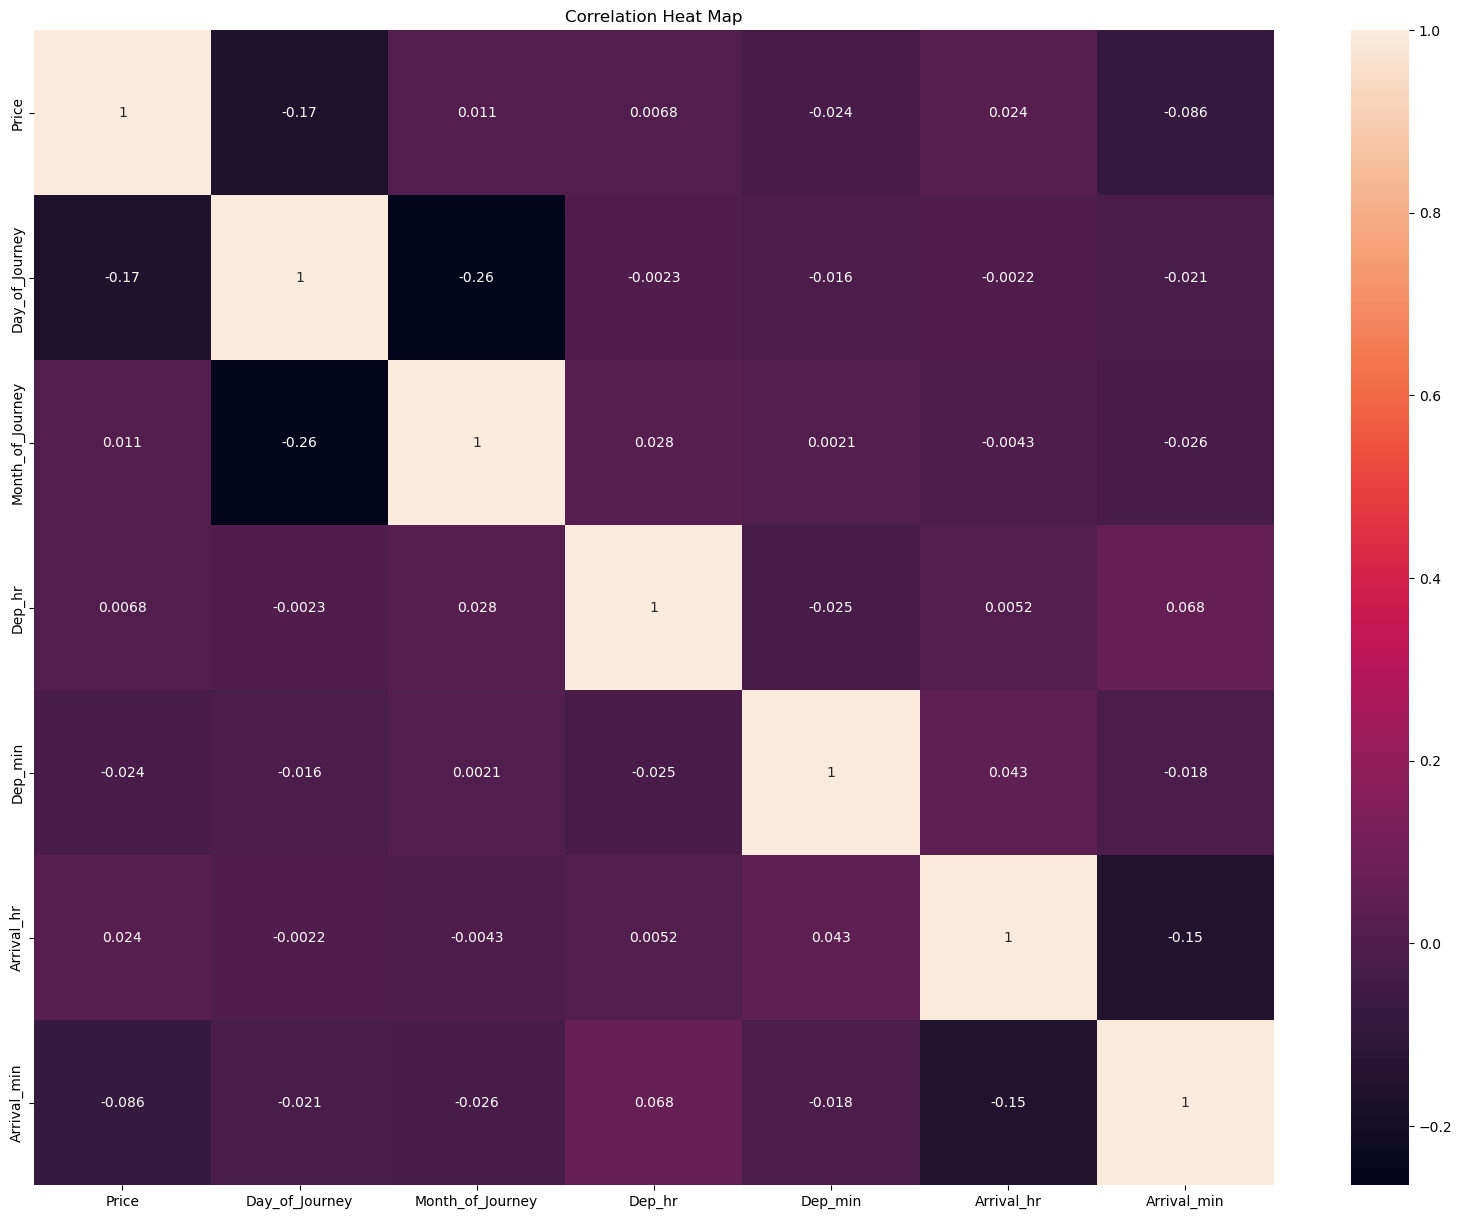

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')
plt.show()

_**Label Encoding the <span style='color:blue'> Total Stops</span> column using mapping function**_

In [21]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

_**One Hot Encoding the <span style='color:blue'> Airline </span> ,<span style='color:blue'>Source </span> ,<span style='color:blue'>Destination </span>, <span style='color:blue'>Route </span> ,<span style='color:blue'> Additional_Info </span> columns using pandas and get dummies command**_

In [22]:
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
sour_des_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,sour_des_dummy,df],axis=1)

_**Dropping the columns <span style='color:blue'> Airline </span> ,<span style='color:blue'>Source </span> ,<span style='color:blue'>Destination </span>, <span style='color:blue'>Route </span> ,<span style='color:blue'> Additional_Info </span> from the dataset which is not needed**_

In [23]:
df.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)

_**Assigning the dependent and independent variable**_

In [24]:
x=df.drop(['Price'],axis=1)
y=df['Price']

_**Fitting the Extra Tree Regressor Model with the dependent and independent variable and getting r2 score between the predicted values and dependent test dataset**_

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
et=ExtraTreesRegressor()
et.fit(x,y)
y_pred=et.predict(x)
r2_score(y,y_pred)

0.9633112971563128

# Model Fitting

_**Splitting the dependent and independent variable into training and test dataset using train test split**_

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

_**Fitting the Random Forest Regressor Model with the train dependent and train independent variable and getting r2 score between the predicted values and dependent test dataset**_

In [27]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
r2_score(y_test,rf_pred)

0.8059036865410693

_**Fitting the Extra Tree Regressor Model with the train dependent and train independent variable and getting r2 score between the predicted values and dependent test dataset**_

In [28]:
ET=ExtraTreesRegressor(n_estimators=120)
ET.fit(x_train,y_train)
et_pred=ET.predict(x_test)
r2_score(y_test,et_pred)

0.7893691873532018

_**Plotting the bar graph to represents Feature important of the independent variable**_

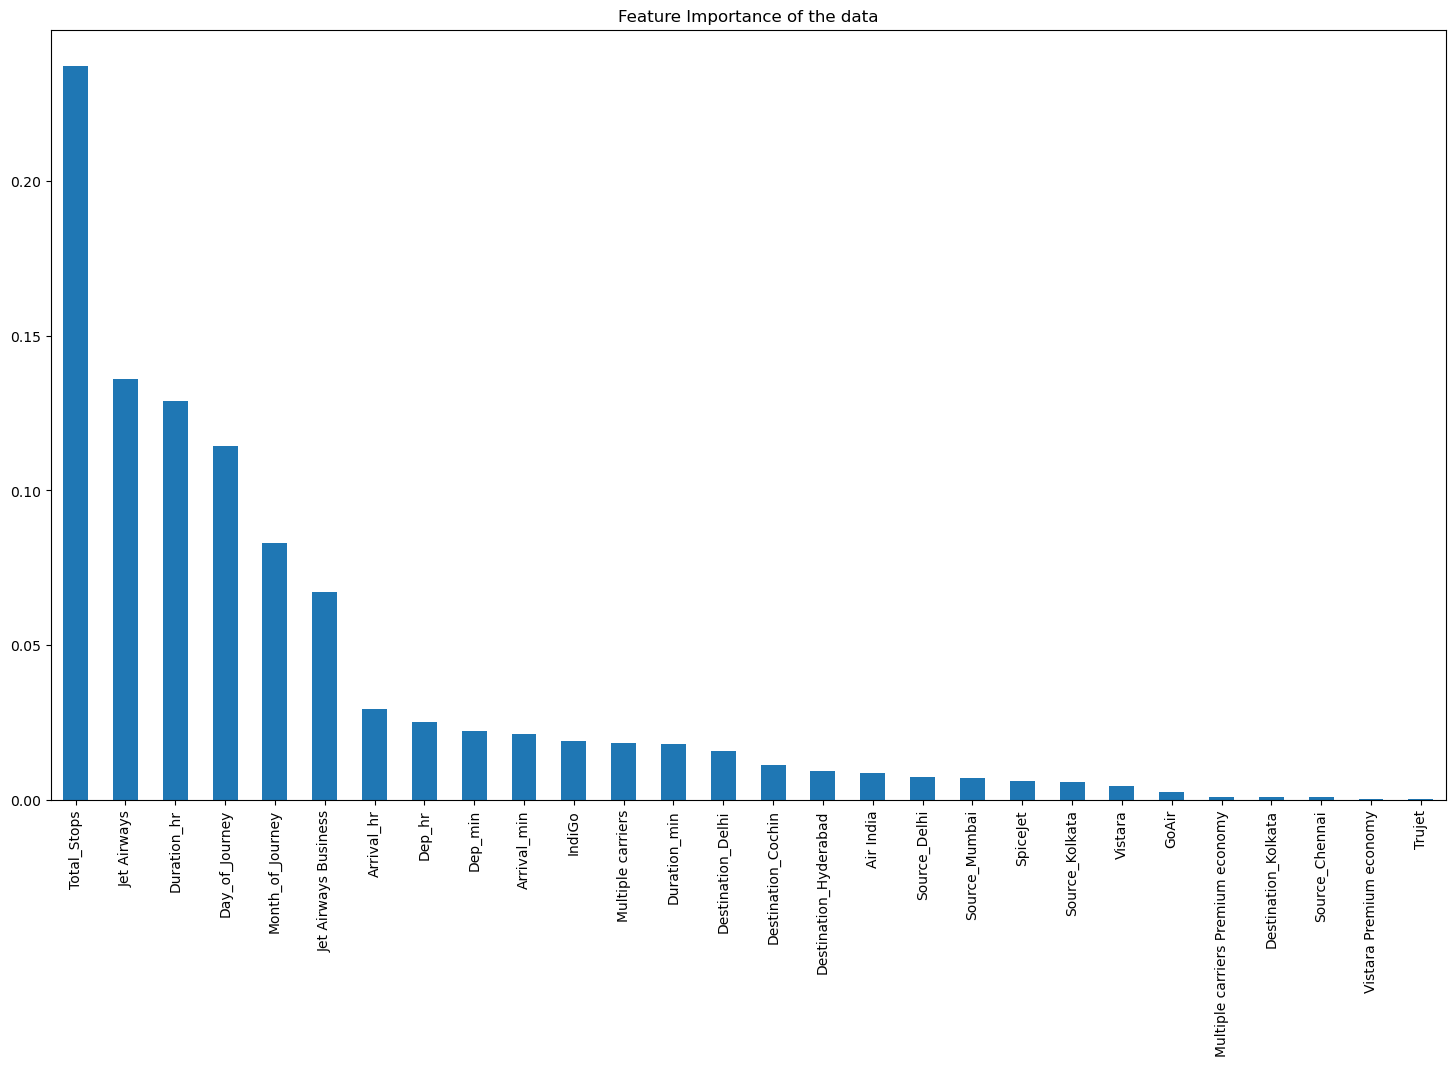

In [29]:
pd.Series(et.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))
plt.title('Feature Importance of the data')
plt.savefig('Feature Importance of the data.png')
plt.show()

_**Fitting the CatBoost Regressor Model with the train dependent and train independent variable and getting r2 score between the predicted values and dependent test dataset**_

In [30]:
cat=CatBoostRegressor()
cat.fit(x_train,y_train)
cat_pred=cat.predict(x_test)
r2_score(y_test,cat_pred)

Learning rate set to 0.056264
0:	learn: 4431.6994708	total: 142ms	remaining: 2m 22s
1:	learn: 4288.4586131	total: 149ms	remaining: 1m 14s
2:	learn: 4155.0642392	total: 154ms	remaining: 51.3s
3:	learn: 4033.0023842	total: 161ms	remaining: 40.2s
4:	learn: 3918.5522438	total: 168ms	remaining: 33.4s
5:	learn: 3803.1974731	total: 175ms	remaining: 29s
6:	learn: 3701.3640491	total: 185ms	remaining: 26.3s
7:	learn: 3611.7359018	total: 192ms	remaining: 23.8s
8:	learn: 3523.4712253	total: 199ms	remaining: 21.9s
9:	learn: 3447.4137645	total: 205ms	remaining: 20.3s
10:	learn: 3364.6153832	total: 211ms	remaining: 18.9s
11:	learn: 3293.4315885	total: 217ms	remaining: 17.9s
12:	learn: 3229.0013086	total: 222ms	remaining: 16.9s
13:	learn: 3165.9800914	total: 227ms	remaining: 16s
14:	learn: 3104.8997330	total: 232ms	remaining: 15.2s
15:	learn: 3051.6664353	total: 237ms	remaining: 14.6s
16:	learn: 2999.7076347	total: 243ms	remaining: 14.1s
17:	learn: 2955.7180857	total: 248ms	remaining: 13.6s
18:	learn:

0.8666885394466252

_**Changing the data type of the <span style='color:blue'> duration_hr </span> ,<span style='color:blue'>duration_min </span> column from "Object" to "Int"**_ 

In [31]:
x_train[['Duration_hr','Duration_min']]=x_train[['Duration_hr','Duration_min']].astype('int')
x_test[['Duration_hr','Duration_min']]=x_test[['Duration_hr','Duration_min']].astype('int')

_**Fitting the random forest regressor model with the list of parameters in the RandomizedSearchCV Algorithm and getting the r2 Score between the predicted values and dependent test dataset**_

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',
                       n_iter=10,cv=3,random_state=42, n_jobs = 1)

rCV.fit(x_train,y_train)
rf_pred=rCV.predict(x_test)
r2_score(y_test,rf_pred)

0.8170536659316847

_**Fitting the LGBM Regressor Model with the train dependent and train independent variable and getting r2 score between the predicted values and dependent test dataset**_

In [33]:
lgb=LGBMRegressor(random_state=0)
lgb.fit(x_train,y_train)
lgb_pred=lgb.predict(x_test)
r2_score(y_test,lgb_pred)

0.8162294925874082

_**Fitting the XGBoost Regressor Model with the train dependent and train independent variable and getting r2 score between the predicted values and dependent test dataset**_

In [34]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
r2_score(y_test,xgb_pred)

0.8475815935971374

_**Create the pickle file on the model with the highest r2 score with the model name**_

In [35]:
import pickle
pickle.dump(cat,open('bestmodel.pkl','wb'))

_**Loading the pickle file**_

In [36]:
model=pickle.load(open('bestmodel.pkl','rb'))

# Loading of Test Data:

_**reading the Test dataset from the Pandas command**_

In [37]:
df_test=pd.read_excel('Test_set.xlsx')

# Data Cleaning of Test Data:

_**Changing the Data Types to Date of Journey format and Adding the new columns by seperating the day and month from the <span style= 'color:blue'>Date of Journey</span> column**_

In [38]:
df_test['Day_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).dt.month

_**Changing the Data Types to Date of Journey format and Adding the new columns by seperating the Hour and Minute from the <span style= 'color:blue'> Depature Time and Arrival Time</span> column**_

In [39]:
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

**_Assigning the new variable and splitting hour and minutes and extracting it from the <span style='color:blue'>Duration</span> column and Filling out the nul values to 00 minutes to the minutes column of the assigned new variable_**

In [40]:
duration=df_test['Duration'].str.split(' ',expand=True)
duration[1].fillna('00m',inplace=True)


_**Adding two new columns with the duration hour and duration minutues from the assigned new variable columns**_

In [41]:
df_test['Duration_hr']=duration[0].apply(lambda x:x[:-1])
df_test['Duration_min']=duration[1].apply(lambda x:x[:-1])

_**Dropping the columns <span style='color:blue'> Date of Journey </span> ,<span style='color:blue'> Arrival Time </span> ,<span style='color:blue'> Depature Time </span>, <span style='color:blue'> Duration </span> from the dataset which is not needed**_

In [42]:
df_test.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Duration'],axis=1,inplace=True)

_**Label Encoding the <span style='color:blue'> Total Stops</span> column using mapping function**_

In [43]:
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

_**Checking the city names of the <span style='color:blue'> Destination</span> column**_

In [44]:
df_test['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

_**Replacing the same cities under single name from the <span style='color:blue'> Destination</span> column**_

In [45]:
df_test['Destination']=df_test['Destination'].apply(lambda x:x.replace('New Delhi','Delhi'))

_**One Hot Encoding the <span style='color:blue'> Airline </span> ,<span style='color:blue'>Source </span> ,<span style='color:blue'>Destination </span>, <span style='color:blue'>Route </span> ,<span style='color:blue'> Additional_Info </span> columns using pandas and get dummies command**_

In [46]:
air_dum=pd.get_dummies(df_test['Airline'],drop_first=True)
sour_dest=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dum,sour_dest,df_test],axis=1)

_**Dropping the columns <span style='color:blue'> Airline </span> ,<span style='color:blue'>Source </span> ,<span style='color:blue'>Destination </span>, <span style='color:blue'>Route </span> ,<span style='color:blue'> Additional_Info </span> from the dataset which is not needed**_

In [47]:
df_test.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)

_**Predicted the <span style='color:blue'> Price</span> of test data using the loaded pickle file**_

In [48]:
pred=model.predict(df_test)

_**Making the Predicted value as a new dataframe and concating it with test data**_

In [49]:
prediction_df=pd.DataFrame(pred,columns=['Predicted Price(Approx.)'])
final_df=pd.concat([df_test,prediction_df],axis=1)

**_Exporting the Test Data **_

In [50]:
final_df.to_csv('Predicted Flight Price.csv',index=False)